# tensorflow keras练习——图片分类

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from scipy import stats

# 使能动态图机制
tf.enable_eager_execution()

## mnist数字分类

### 数据加载

In [3]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


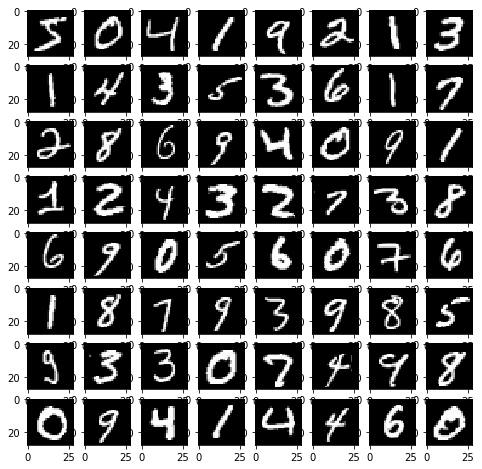

In [5]:
fig = plt.figure(figsize=(8, 8))
n = 8 # 行列数
for i in range(n * n):
    img = x_train[i].reshape(28, 28)
    ax = fig.add_subplot(n, n, i + 1)
    ax.imshow(img, cmap='gray')
fig.show()

In [6]:
# 对数据进行归一化处理
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
# 对标签进行one-hot处理
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### 模型构建

In [8]:
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [9]:
model = keras.Sequential() # # 顺序模型，是多个网络层的线性堆叠
model.add(Flatten()) #Flatten层用来将输入“压平”，即把多维的输入一维化
model.add(Dense( # 全连接层，输出空间维度(32,)，输入空间维度(784,)，激活函数relu
    32,
    activation='relu',
    input_shape=(28 * 28,)))
model.add(Dropout(0.2))
model.add(Dense( # 全连接层，输出空间维度(10,)，输入空间维度(32,)，激活函数relu
    10,
    activation='softmax',
    input_shape=(32,)))

In [10]:
# 随机梯度下降最大的缺点在于每次更新可能并不会按照正确的方向进行，可能带来优化扰动
sgd = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy', # 交叉熵损失函数
              metrics=['accuracy'])

### 训练

In [11]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 5s 80us/sample - loss: 0.8630 - acc: 0.7428
Epoch 2/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4869 - acc: 0.8582
Epoch 3/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4203 - acc: 0.8765
Epoch 4/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3813 - acc: 0.8890
Epoch 5/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3546 - acc: 0.8964
Epoch 6/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3388 - acc: 0.9014
Epoch 7/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3234 - acc: 0.9058
Epoch 8/20
60000/60000 [===========================

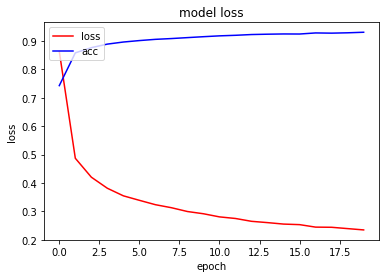

In [12]:
plt.plot(history.history['loss'], c='r')
plt.plot(history.history['acc'], c='b')
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["loss", "acc"], loc="upper left")
plt.show()

### 结果评估

In [13]:
score = model.evaluate(x_test, y_test)
print("loss:%.4f" % score[0])
print("acc:%.4f" % score[1])

10000/10000 [==============================] - 0s 48us/sample - loss: 0.1635 - acc: 0.9512
loss:0.1635
acc:0.9512


## fashion mnist分类

参考：
- [基于keras的fashion_mnist的卷积神经网络（CNN）](https://blog.csdn.net/qq_34355232/article/details/79087075)

### 数据加载

In [14]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [15]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


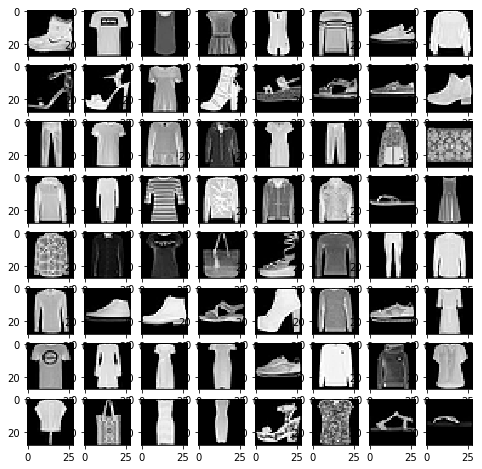

In [16]:
fig = plt.figure(figsize=(8, 8))
n = 8 # 行列数
for i in range(n * n):
    img = train_images[i].reshape(28, 28)
    ax = fig.add_subplot(n, n, i + 1)
    ax.imshow(img, cmap='gray')
fig.show()

In [17]:
# 对数据进行归一化处理
train_images = train_images / 255.0
test_images = test_images / 255.0

In [18]:
# 对数据维度进行变更
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') 
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32')

In [19]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


### 模型构建

In [20]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers

In [21]:
# 类似VGG的卷积神经网络

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [23]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy', # 交叉熵损失函数
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

### 训练

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
21088/60000 [=========>....................] - ETA: 42s - loss: 0.6093 - acc: 0.7868

In [ ]:
plt.plot(history.history['loss'], c='r')
plt.plot(history.history['acc'], c='b')
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["loss", "acc"], loc="upper left")
plt.show()

### 结果评估

In [ ]:
score = model.evaluate(test_images, test_labels)
print("loss:%.4f" % score[0])
print("acc:%.4f" % score[1])